In [1]:
from google.colab import drive
import numpy as np
from scipy.sparse import dok_matrix
import networkx as nx

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
% cd /content/drive/MyDrive/stanford/
% ls

/content/drive/MyDrive/stanford
web-Stanford.txt


In [11]:
A = np.array([
  [0, 0, 1, 1],
  [1, 0, 0, 0],
  [1, 1, 0, 1],
  [1, 1, 0, 0],
])
A = A/np.sum(A, axis=0)
v = np.array([1, 1, 1, 1])
v = v/np.sum(v)
v = v.reshape((4, 1))
A

array([[0.        , 0.        , 1.        , 0.5       ],
       [0.33333333, 0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        , 0.5       ],
       [0.33333333, 0.5       , 0.        , 0.        ]])

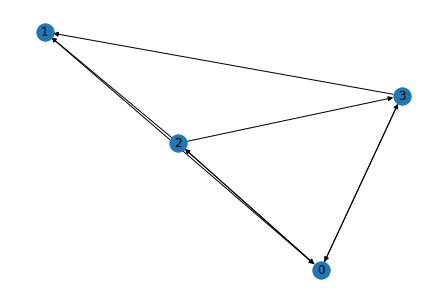

In [12]:
G = nx.DiGraph()
for ii, i in enumerate(A):
  for jj, j in enumerate(i):
    if j>0:
      G.add_edge(ii, jj, weight=j)
nx.draw(G, with_labels=True)   

In [13]:
v = [0.25, 0.25, 0.25, 0.25]
while True:
  new_v = A @ v
  if np.allclose(new_v, v):
    break
  v = new_v
v

array([0.38709616, 0.12903205, 0.29032302, 0.19354877])

In [14]:
A = np.array([
  [0, 0, 1, 1],
  [1, 0, 0, 0],
  [1, 1, 0, 1],
  [1, 1, 0, 0],
])
D = np.linalg.inv(np.diag([3, 2, 1, 2]))
H = A @ D
# A @ D
v = np.array([1, 1, 1, 1])
N = len(v)
v = v/np.sum(v)
damping_factor = 0.85
iters = 0
while True:
  new_v = damping_factor * (H @ v) + (1-damping_factor)/N
  # print(new_v)
  iters+=1
  if np.allclose(new_v, v):
    break
  v = new_v
iters, v

(16, array([0.36815162, 0.14180823, 0.2879621 , 0.20207804]))

In [15]:
# now for the big file
G = nx.DiGraph()
dims = 281903
sparce_matrix = dok_matrix((dims, dims), dtype=np.float32)
D = np.zeros(dims)
with open('web-Stanford.txt', 'r') as f:
  # skipping first 4 comments, can be done by putting condition of '#' but why check thousand times!
  for i in range(4):
    next(f)
  for i in f:
    start_node, end_node = list(map(int, i.split()))
    G.add_edge(start_node, end_node)
    D[start_node-1] = D[start_node-1] + 1
with open('web-Stanford.txt', 'r') as f:
  # skipping first 4 comments, can be done by putting condition of '#' but why check thousand times!
  for i in range(4):
    next(f)
  for i in f:
    start_node, end_node = list(map(int, i.split()))
    sparce_matrix[start_node-1, end_node-1] = 1/D[start_node-1]
sparce_matrix = sparce_matrix.tocsr()

In [ ]:
nx.draw(G, with_labels=True)   

In [ ]:
def get_ranks(H, v, N, dangling_factor=0.85):
  iters = 0
  while True:
    new_v = dangling_factor * (H @ v) + (1-dangling_factor)/N
    # print(new_v)
    iters+=1
    if np.allclose(new_v, v):
      break
    v = new_v
  print(iters)
  print(v)
  return v
v = np.ones(dims)/dims
z = get_ranks(sparce_matrix, v, dims)

In [ ]:
np.sum(z)